In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import ujson as json

import torch


from tqdm import tqdm
import numpy as np
from safetensors import safe_open
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
# Set font globally to Times New Roman
plt.rcParams['font.family'] = 'DejaVu Serif'
fontsize = 19
import matplotlib.pyplot as plt


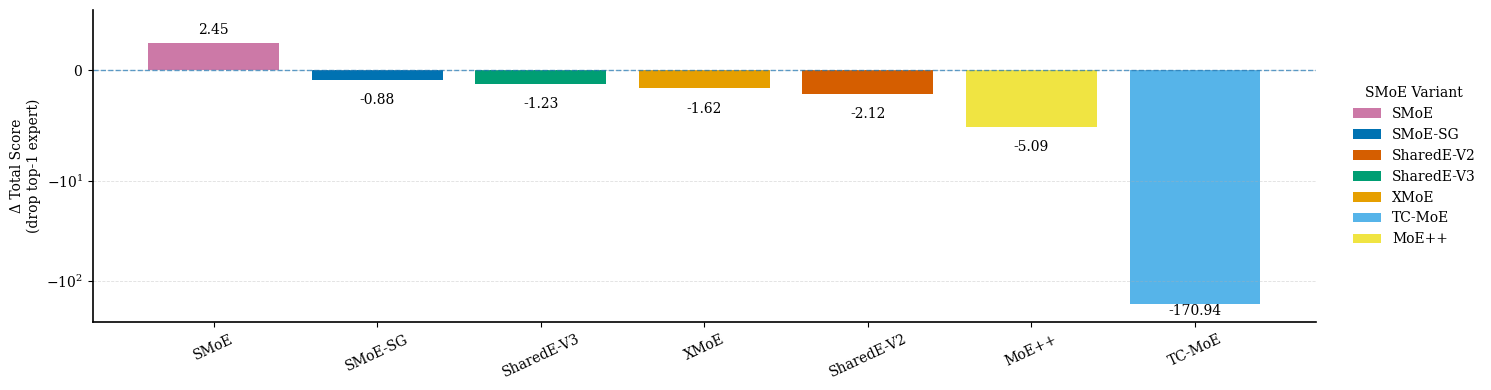

In [ ]:

# ===== DATA (unsorted) =====
methods = ["SMoE", "SMoE-SG", "SharedE-V2",
           "SharedE-V3", "XMoE", "TC-MoE", "MoE++"]
drops   = [ 2.45, -0.88, -2.12, -1.23, -1.62, -170.94, -5.09]
palette = dict(zip(methods,
                  ["#CC79A7", "#0072B2", "#D55E00", "#009E73",
                   "#E69F00", "#56B4E9", "#F0E442"]))

# -------- sort by value (descending) --------
sorted_tuples = sorted(zip(drops, methods), reverse=True)  # largest → smallest
sorted_drops, sorted_methods = zip(*sorted_tuples)
sorted_colors = [palette[m] for m in sorted_methods]

# -------- plot --------
plt.rcParams["font.family"] = "DejaVu Serif"
fig, ax = plt.subplots(figsize=(15, 4))
bars = ax.bar(sorted_methods, sorted_drops, color=sorted_colors)

ax.set_yscale("symlog", linthresh=10)
ax.set_ylim(min(sorted_drops) - 90, max(sorted_drops) + 3)

# labels
for bar, val in zip(bars, sorted_drops):
    y = val + 0.6 if val >= 0 else val - 1.2
    va = "bottom" if val >= 0 else "top"
    ax.text(bar.get_x() + bar.get_width()/2, y, f"{val:.2f}",
            ha="center", va=va, fontsize=10)

# legend keeps original order
from matplotlib.patches import Patch
handles = [Patch(facecolor=palette[m], label=m) for m in palette]
ax.legend(handles=handles, title="SMoE Variant",
          bbox_to_anchor=(1.02, 0.5), loc="center left", frameon=False)

ax.axhline(0, ls="--", lw=1, alpha=.7)
ax.set_ylabel("Δ Total Score\n(drop top‑1 expert)")
ax.tick_params(axis="x", rotation=25)

# spines
for side in ("top", "right"):
    ax.spines[side].set_visible(False)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.yaxis.grid(True, which="both", linestyle="--", linewidth=0.6, alpha=0.4)


plt.tight_layout()
plt.savefig("/cm/shared/anonymous_h100/LibMoE/evaluate/analysis/libmoev2/figures/droptop1.pdf", format='pdf', bbox_inches='tight', dpi=300)

plt.show()


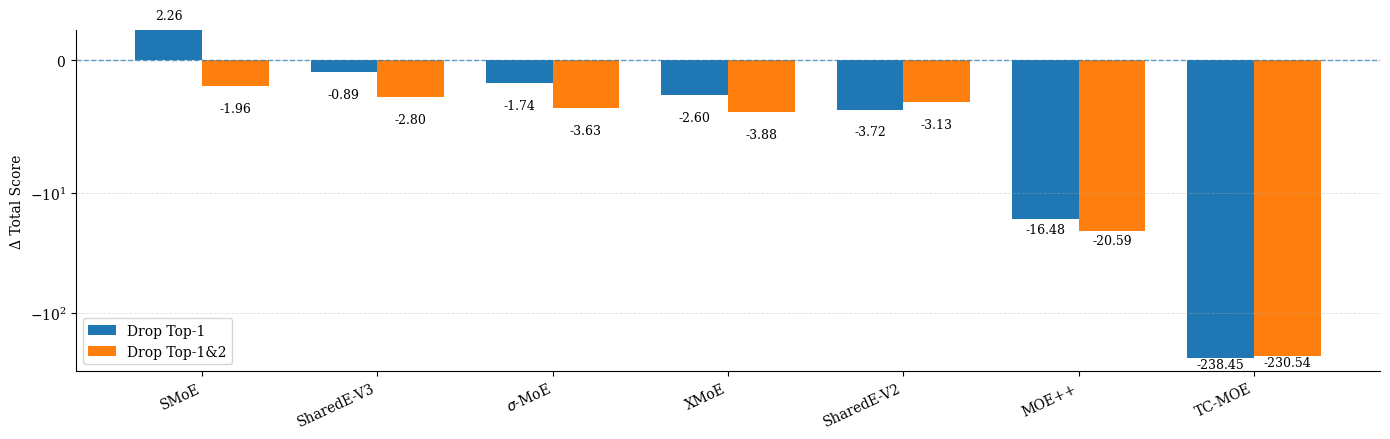

Saved files:
 - ./drop_grouped.pdf
 - ./drop_grouped.png


In [25]:
# Group Top-1 and Top-1&2 into a single grouped bar chart
# Saves to . as PDF/PNG

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.unicode_minus'] = False    # use the proper minus sign glyph

# Data
top1 = {
    "SMoE": 2.26,
    "$\sigma$-MoE": -1.74,
    "SharedE-V2": -3.72,
    "SharedE-V3": -0.89,
    "XMoE": -2.60,
    "TC-MOE": -238.45,
    "MOE++": -16.48,
}

top2 = {
    "SMoE": -1.96,
    "$\sigma$-MoE": -3.63,
    "SharedE-V2": -3.13,
    "SharedE-V3": -2.80,
    "XMoE": -3.88,
    "TC-MOE": -230.54,
    "MOE++": -20.59,
}

# Choose a single order for methods (descending by Top-1 for readability)
order = sorted(top1.keys(), key=lambda k: top1[k], reverse=True)

x = np.arange(len(order))
vals1 = np.array([top1[m] for m in order])
vals2 = np.array([top2[m] for m in order])

width = 0.38

fig, ax = plt.subplots(figsize=(14, 4.5))

b1 = ax.bar(x - width/2, vals1, width, label="Drop Top-1")
b2 = ax.bar(x + width/2, vals2, width, label="Drop Top-1&2")

# Shared settings
ax.set_yscale("symlog", linthresh=10)

# y-limits considering both series
min_v = float(np.minimum(vals1, vals2).min())
max_v = float(np.maximum(vals1, vals2).max())
margin_low = max(0.5, 0.02 * abs(min_v))   # smaller bottom margin
margin_high = 0.5                           # smaller top margin
margin_low = max(1, abs(min_v) * 0.1) + 45
margin_high = 0
ax.set_ylim(min_v - margin_low, max_v + margin_high)

ax.axhline(0, linestyle="--", linewidth=1, alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(order, rotation=25, ha="right")
ax.set_ylabel("Δ Total Score")
# ax.set_title("Drop when removing Top-1 vs Top-1&2 Experts (Grouped)")
ax.legend()

# Annotate values
def annotate(bars, values):
    for bar, val in zip(bars, values):
        if val >= 0:
            y = val + 0.6
            va = "bottom"
        else:
            y = val - 1.2
            va = "top"
        ax.text(bar.get_x() + bar.get_width()/2, y, f"{val:.2f}", ha="center", va=va, fontsize=9)

annotate(b1, vals1)
annotate(b2, vals2)

ax.yaxis.grid(True, which="both", linestyle="--", linewidth=0.6, alpha=0.4)
for side in ("top", "right"):
    ax.spines[side].set_visible(False)

plt.tight_layout()
plt.savefig("./drop_grouped.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.savefig("./drop_grouped.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

print("Saved files:\n - ./drop_grouped.pdf\n - ./drop_grouped.png")
